In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/MUSCULOSKELETAL HEALTH - Sheet1.csv')
df2=pd.read_csv('/content/drive/MyDrive/Test_data_version1.xlsx - Sheet1.csv')


df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,KHAIGHGPTTL155,5.712342e+08,3.739306e+07,1.152345e+09
1,KHAIGHGPTTL156,1.251631e+09,9.220119e+04,8.085465e+08
2,KHAIGHGPTTL157,6.028514e+08,2.764356e+05,9.785774e+08
3,KHAIGHGPTTL158,9.028730e+08,1.843184e+05,8.086463e+08
4,KHAIGHGPTTL159,6.047848e+08,2.763516e+05,1.175862e+09
...,...,...,...,...
2145,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09
2146,KHYUNQGPTTL10,1.851188e+08,0.000000e+00,3.647334e+08
2147,KHYUNQGPTTL11,1.831921e+08,4.610059e+04,6.262528e+08
2148,KHAIGPRX1340,1.504679e+06,0.000000e+00,2.499629e+08


In [ ]:
df2

,Patient_ID,Diabetes,High Blood pressure,Coronary Artery Disease,Arrhythmia,"Heart Failure- Dilated Cardiomyopathy, Restrictive Cardiomyopathy",Cholesterol disorders,Hypertriglyceridemia,"Thyroid Disorders- Hypothyroidism, Hyperthyroidism","Anemia- Microcytic, Hemolytic",...,Fatigue,"Mood Disorders- Anxiety, Schizophrenia, Depression",Urticaria,Essential tremors,Renal Disorders,"Sinusitis, Dust Allergy (Ciliary dykinesia, Hyper IgE syndrome, Angioedma, Chroinc granulomatous)",Obesity,Skin Health,Eye Health,Gastritis
0,KHAIGHGPPGX19,Moderate to High,Mild,-,-,-,Mild,Moderate,0,0,...,-,0,-,-,-,-,Mild,-,-,Mild
1,KHAIGHGPPGX22,Mild,Moderate,Mild,-,-,Moderate,Mild,Mild,0,...,-,0,-,-,-,-,Mild,-,-,Mild
2,KHAIGHGPTTL318,Mild to Moderate,Mild,Mild,-,-,Mild,Mild,Low to Mild,0,...,-,0,-,-,-,-,Low to Mild,-,-,Moderate
3,KHAIGHGPTTL319,Mild to Moderate,Mild to Moderate,Mild,-,-,Moderate,Moderate,Low to Mild,0,...,-,0,-,-,-,-,Moderate,-,-,Moderate
4,KHAIGHGPTTL321,Moderate to High,Mild,Mild,-,-,Mild to Moderate,Mild to Moderate,Low to Mild,0,...,-,0,-,-,-,-,Mild to Moderate,-,-,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KHAIGHGPTTL546,Mild,Mild,Mild,-,-,Mild,Moderate,0,0,...,-,Moderate,-,-,-,-,0,-,Mild,-
496,KHAIGHGPTTL548,Low,Moderate to High,Mild,-,-,Moderate,Mild,0,0,...,-,Moderate,-,-,-,-,Moderate,-,-,0
497,KHAIGHGPTTL551,Moderate,Mild,Mild,-,-,Moderate,Moderate,Mild,0,...,-,Moderate,-,-,-,-,Mild,-,-,Moderate
498,KHAIGHGPTTL553,Mild,Mild,Mild,-,-,Mild,Mild,Low,0,...,-,Moderate,-,-,-,-,Mild,-,-,Low to Mild


# EXTRA TREES

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set3.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set3=df_train.copy()
df_train_set3=df_train_set3.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set3.drop(columns=['new_labels'])
y = df_train_set3['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
y_train.value_counts()

,count
new_labels,
3,776
0,776
1,776
2,776


In [ ]:
x_train_valid=df_train_set3.drop(columns=['new_labels'])
y_train_valid=df_train_set3['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Extra Trees Classifier Metrics:
Accuracy: 0.9317010309278351
Precision: 0.9307915249192609
Recall: 0.9317010309278351
F1-score: 0.9310317433496146
Confusion Matrix:
[[194   0   0   0]
 [  1 167  23   3]
 [  0  20 168   6]
 [  0   0   0 194]]


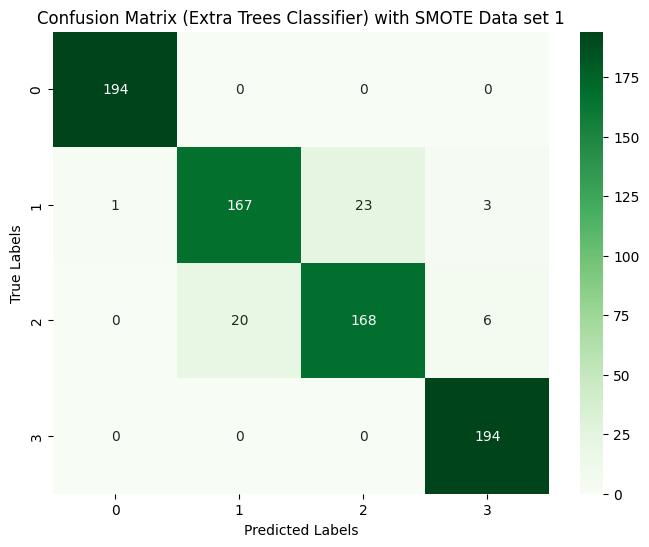

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

# Evaluate the Extra Trees model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Print the evaluation metrics
print("Extra Trees Classifier Metrics:")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"F1-score: {f1_et}")
print(f"Confusion Matrix:\n{conf_matrix_et}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Extra Trees Classifier) with SMOTE Data set 1")
plt.show()

Accuracy (Extra Trees): 0.970291146761735
Precision (Extra Trees): 0.9727016488390732
Recall (Extra Trees): 0.970291146761735
F1-score (Extra Trees): 0.9710872667381398
Confusion Matrix (Extra Trees):
[[ 28   0   0   0]
 [  0 654  22   2]
 [  0  20 944   6]
 [  0   0   0   7]]


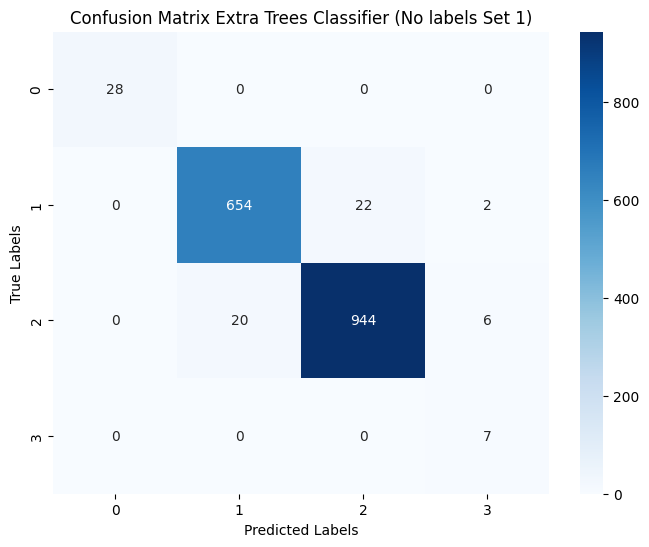

In [ ]:
y_pred_train_et = et_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_train_valid, y_pred_train_et)
precision_et = precision_score(y_train_valid, y_pred_train_et, average='weighted')  # Use 'weighted' for multi-class
recall_et = recall_score(y_train_valid, y_pred_train_et, average='weighted')
f1_et = f1_score(y_train_valid, y_pred_train_et, average='weighted')
conf_matrix_et = confusion_matrix(y_train_valid, y_pred_train_et)

# Print metrics
print(f"Accuracy (Extra Trees): {accuracy_et}")
print(f"Precision (Extra Trees): {precision_et}")
print(f"Recall (Extra Trees): {recall_et}")
print(f"F1-score (Extra Trees): {f1_et}")
print(f"Confusion Matrix (Extra Trees):\n{conf_matrix_et}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier (No labels Set 1)")
plt.show()


Accuracy (Extra Trees Test): 0.7473233404710921
Precision (Extra Trees Test): 0.7571122667482411
Recall (Extra Trees Test): 0.7473233404710921
F1-score (Extra Trees Test): 0.7512465209840214
Confusion Matrix (Extra Trees Test):
[[  1   0   1   0]
 [  1 143  55   5]
 [  1  43 203   7]
 [  0   3   2   2]]


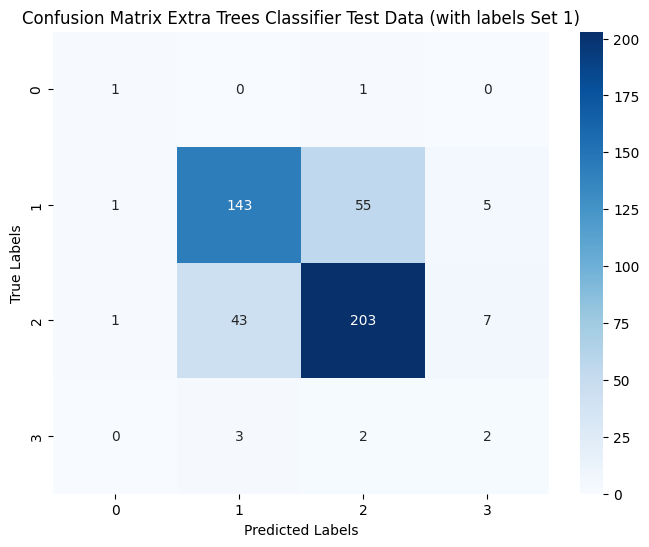

In [ ]:
# Predict on test data
y_pred_test_et = et_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_et_test = accuracy_score(y_test_valid, y_pred_test_et)
precision_et_test = precision_score(y_test_valid, y_pred_test_et, average='weighted')  # Use 'weighted' for multi-class
recall_et_test = recall_score(y_test_valid, y_pred_test_et, average='weighted')
f1_et_test = f1_score(y_test_valid, y_pred_test_et, average='weighted')
conf_matrix_et_test = confusion_matrix(y_test_valid, y_pred_test_et)

# Print metrics
print(f"Accuracy (Extra Trees Test): {accuracy_et_test}")
print(f"Precision (Extra Trees Test): {precision_et_test}")
print(f"Recall (Extra Trees Test): {recall_et_test}")
print(f"F1-score (Extra Trees Test): {f1_et_test}")
print(f"Confusion Matrix (Extra Trees Test):\n{conf_matrix_et_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier Test Data (with labels Set 1)")
plt.show()


# KNN

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set3.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_train_set3=df_train.copy()
df_train_set3=df_train_set3.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set3.drop(columns=['new_labels'])
y = df_train_set3['new_labels']
smote = SMOTE(k_neighbors=5) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set3.drop(columns=['new_labels'])
y_train_valid=df_train_set3['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


KNN Classifier Metrics:
Accuracy: 0.9510309278350515
Precision: 0.9513401366438101
Recall: 0.9510309278350515
F1-score: 0.950703125902392
Confusion Matrix:
[[194   0   0   0]
 [  0 181   9   4]
 [  0  16 171   7]
 [  0   2   0 192]]


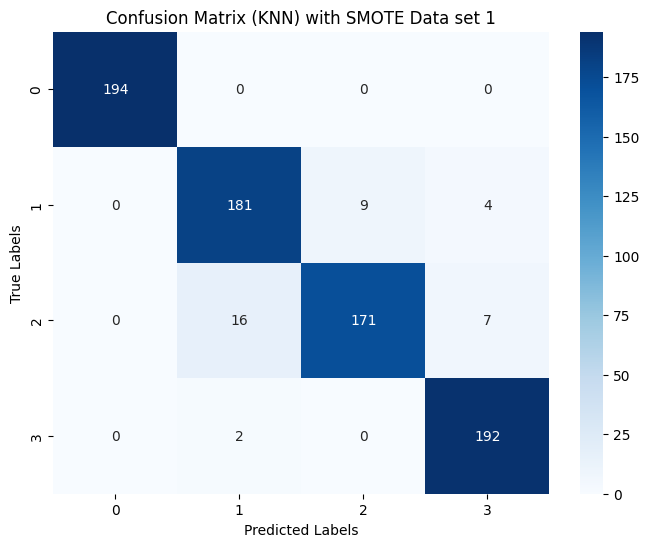

In [ ]:

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Classifier Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (KNN) with SMOTE Data set 1")
plt.show()

Accuracy: 0.9792038027332145
Precision: 0.9831790905610155
Recall: 0.9792038027332145
F1-score: 0.9805944131014908
Confusion Matrix:
[[ 28   0   0   0]
 [  0 666   8   4]
 [  0  16 947   7]
 [  0   0   0   7]]


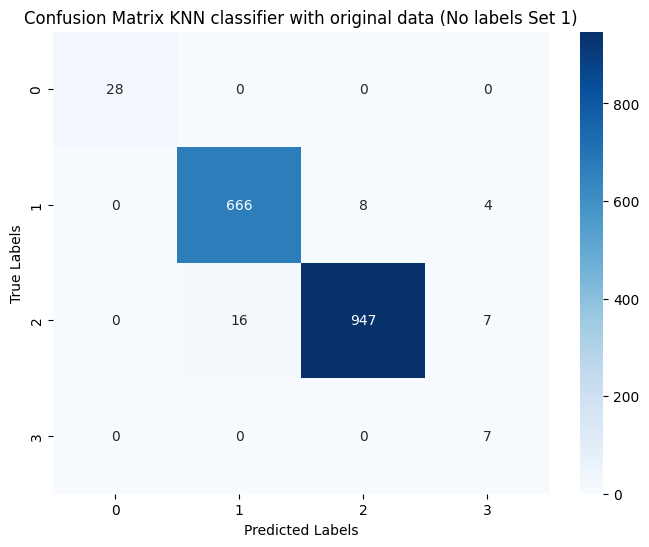

In [ ]:
y_pred_train=knn.predict(x_train_valid_scaled)
accuracy = accuracy_score(y_train_valid, y_pred_train)
precision = precision_score(y_train_valid, y_pred_train, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_train_valid, y_pred_train, average='weighted')
f1 = f1_score(y_train_valid, y_pred_train, average='weighted')
conf_matrix = confusion_matrix(y_train_valid, y_pred_train)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN classifier with original data (No labels Set 1)")
plt.show()

Accuracy: 0.7858672376873662
Precision: 0.7939444896724189
Recall: 0.7858672376873662
F1-score: 0.7889837867475826
Confusion Matrix:
[[  1   0   1   0]
 [  1 151  47   5]
 [  0  35 213   6]
 [  0   3   2   2]]


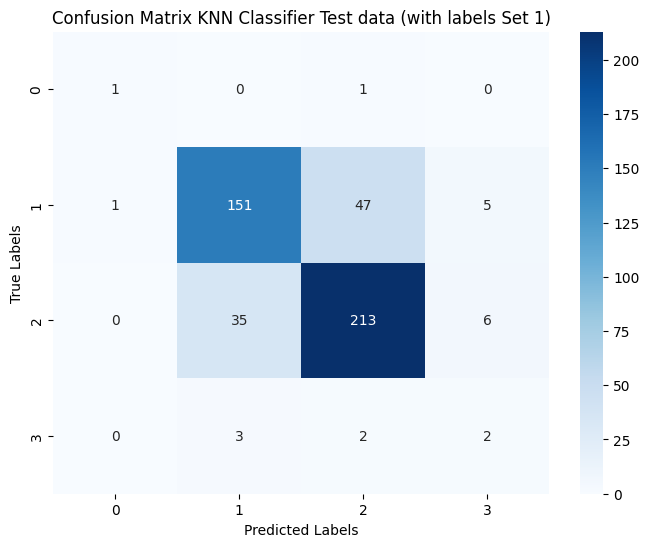

In [ ]:
y_pred_test=knn.predict(x_test_valid_scaled)
accuracy = accuracy_score(y_test_valid, y_pred_test)
precision = precision_score(y_test_valid, y_pred_test, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test_valid, y_pred_test, average='weighted')
f1 = f1_score(y_test_valid, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test_valid, y_pred_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN Classifier Test data (with labels Set 1)")
plt.show()

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set3.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_train_set3=df_train.copy()
df_train_set3=df_train_set3.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=StandardScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set3.drop(columns=['new_labels'])
y = df_train_set3['new_labels']
smote = SMOTE(k_neighbors=2) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set3.drop(columns=['new_labels'])
y_train_valid=df_train_set3['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Metrics:
Accuracy: 0.9329896907216495
Precision: 0.9328554176978454
Recall: 0.9329896907216495
F1-score: 0.9328845767440107
Confusion Matrix:
[[193   0   1   0]
 [  0 171  23   0]
 [  1  26 166   1]
 [  0   0   0 194]]


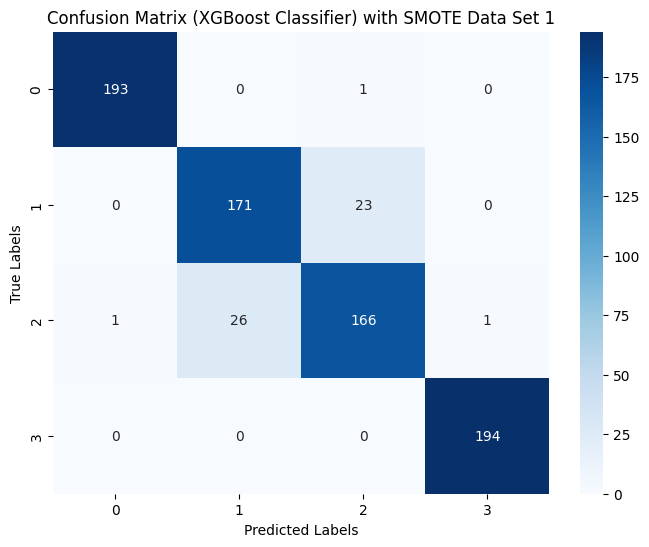

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost Classifier with specified parameters
xgb_classifier = XGBClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=7,
    random_state=42,
    use_label_encoder=False,  # Suppress label encoding warning (for newer versions of XGBoost)
    eval_metric='logloss'    # Specify the evaluation metric explicitly
)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-score: {f1_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGBoost Classifier) with SMOTE Data Set 1")
plt.show()


Accuracy (XGBoost): 0.9696969696969697
Precision (XGBoost): 0.969791040810556
Recall (XGBoost): 0.9696969696969697
F1-score (XGBoost): 0.9697195663076407
Confusion Matrix (XGBoost):
[[ 27   0   1   0]
 [  0 656  22   0]
 [  1  26 942   1]
 [  0   0   0   7]]


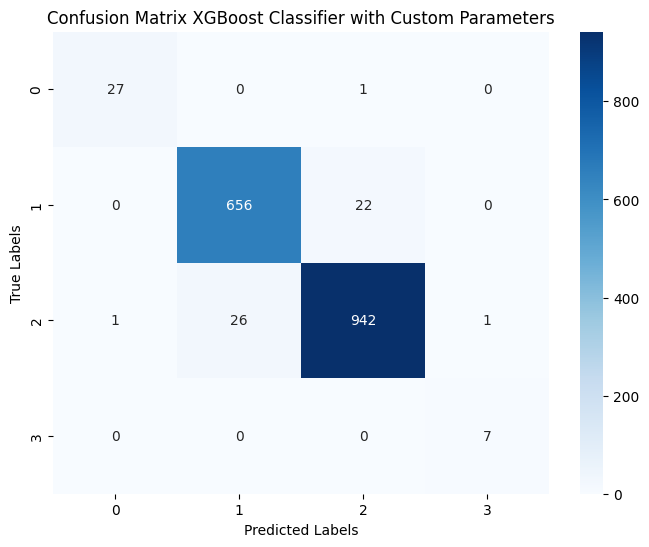

In [ ]:
# Predict on training data
y_pred_train_xgb = xgb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_train_valid, y_pred_train_xgb)
precision_xgb = precision_score(y_train_valid, y_pred_train_xgb, average='weighted')  # Use 'weighted' for multi-class
recall_xgb = recall_score(y_train_valid, y_pred_train_xgb, average='weighted')
f1_xgb = f1_score(y_train_valid, y_pred_train_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_train_valid, y_pred_train_xgb)

# Print metrics
print(f"Accuracy (XGBoost): {accuracy_xgb}")
print(f"Precision (XGBoost): {precision_xgb}")
print(f"Recall (XGBoost): {recall_xgb}")
print(f"F1-score (XGBoost): {f1_xgb}")
print(f"Confusion Matrix (XGBoost):\n{conf_matrix_xgb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix XGBoost Classifier with Custom Parameters")
plt.show()


Accuracy (XGBoost Test): 0.734475374732334
Precision (XGBoost Test): 0.7337719517058396
Recall (XGBoost Test): 0.734475374732334
F1-score (XGBoost Test): 0.7324218718292077
Confusion Matrix (XGBoost Test):
[[  1   0   1   0]
 [  0 141  62   1]
 [  0  55 199   0]
 [  0   3   2   2]]


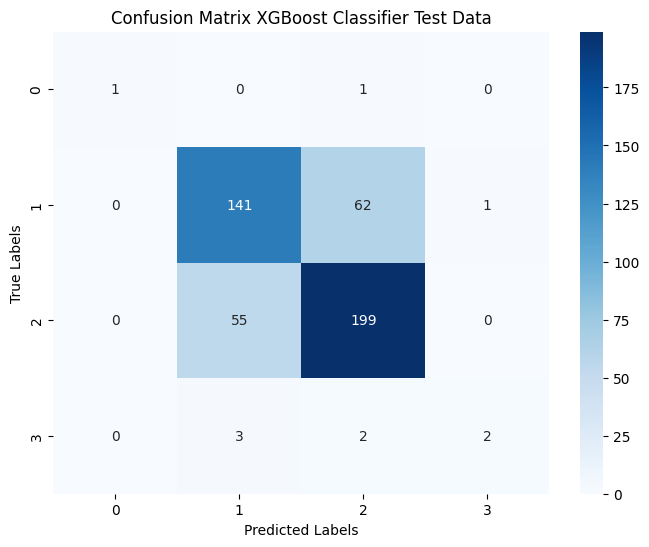

In [ ]:
# Predict on test data
y_pred_test_xgb = xgb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_xgb_test = accuracy_score(y_test_valid, y_pred_test_xgb)
precision_xgb_test = precision_score(y_test_valid, y_pred_test_xgb, average='weighted')  # Use 'weighted' for multi-class
recall_xgb_test = recall_score(y_test_valid, y_pred_test_xgb, average='weighted')
f1_xgb_test = f1_score(y_test_valid, y_pred_test_xgb, average='weighted')
conf_matrix_xgb_test = confusion_matrix(y_test_valid, y_pred_test_xgb)

# Print metrics
print(f"Accuracy (XGBoost Test): {accuracy_xgb_test}")
print(f"Precision (XGBoost Test): {precision_xgb_test}")
print(f"Recall (XGBoost Test): {recall_xgb_test}")
print(f"F1-score (XGBoost Test): {f1_xgb_test}")
print(f"Confusion Matrix (XGBoost Test):\n{conf_matrix_xgb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix XGBoost Classifier Test Data")
plt.show()